<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/01_Supervised-%20Machine%20Learning/01_Linear_Regression/Employee_salary_prediction/Employee_salary_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

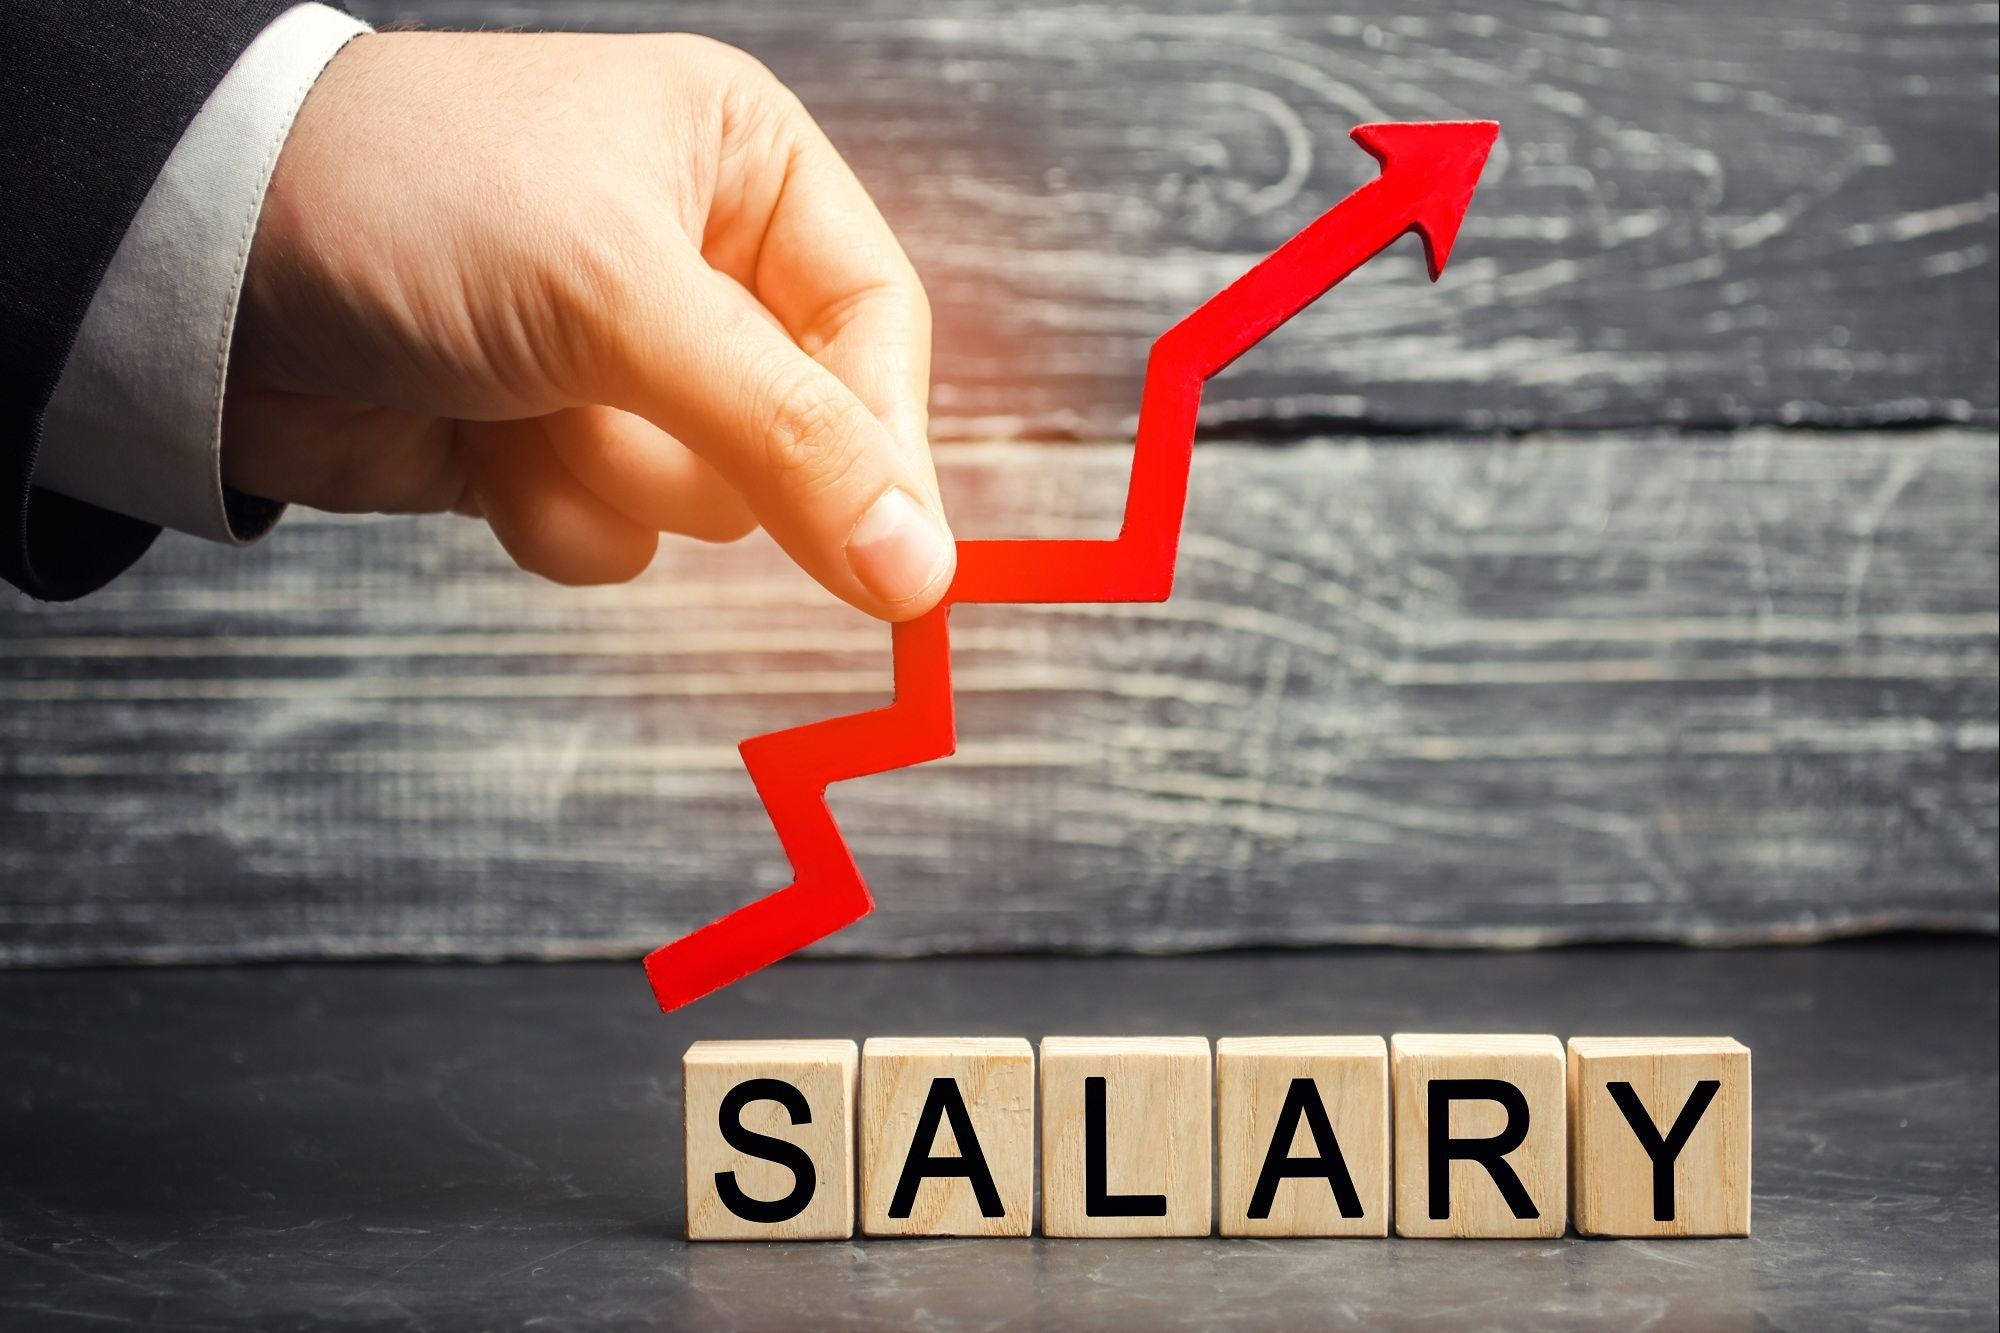
#**Countries Employee Salary prediction using LinearRegression**

📘 Project Summary

This project involves an end-to-end data processing and feature engineering workflow designed to build a robust model for predicting an employee's salary based on various professional and features.

**Data Loading & Cleaning**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Salary.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [ ]:
#checking to see if my data has Null values or Duplicate values
print(f"Null_Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate_Values: {df.duplicated().sum()}")

Null_Values: Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64


Duplicate_Values: 1536


In [ ]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

**Feature Engineering**

In [ ]:
#Country and Racism' Feature: A combined feature is created to give meaning
df["Country and Racism"] = df["Country"]+ "-"+df["Race"]


#Handling Categorical Data (Target Encoding)
#creating target encoded variable
country_racism_encode = df.groupby("Country and Racism")["Salary"].mean().to_dict()
Job_title_encode = df.groupby("Job Title")["Salary"].mean().to_dict()

# creating new target encoded columns
df["Job Title.target_encode"] = df["Job Title"].map(Job_title_encode)
df["Country and Racism.target_encode"] = df["Country and Racism"].map(country_racism_encode)

# Dropping irrelevant columns
df = df.drop(columns=["Job Title","Country","Race","Country and Racism"])

df["Gender"] = df["Gender"].map({"Male":"1", "Female":0})
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Senior,Job Title.target_encode,Country and Racism.target_encode
0,32.0,1,1,5.0,90000.0,0,122312.950847,115886.773585
1,28.0,0,2,3.0,65000.0,0,119470.355731,109450.629771
2,45.0,1,3,15.0,150000.0,1,160000.000000,114591.091463
3,36.0,0,1,7.0,60000.0,0,31005.952381,109450.629771
4,52.0,1,2,20.0,200000.0,0,200000.000000,111858.737037


In [ ]:
#Knowing columns with strong correlations to Salary
abs(df.corr(numeric_only=True)["Salary"]).sort_values(ascending=False)

,Salary
Salary,1.000000
Years of Experience,0.816030
Job Title.target_encode,0.773414
Age,0.742980
Education Level,0.644207
Senior,0.234674
Country and Racism.target_encode,0.044005


**Seperating input features from target variable**


In [ ]:
x = df.drop(columns=["Salary"])
y = df["Salary"]


**Model Preparation:** The dataset is split into training and testing sets to evaluate performance.

In [ ]:

#preparing data for training and testing for my model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=83)

#scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

**Model Building:** Two models are tested
Linear Regression – for simple linear relationships.

Random Forest Regressor – a more powerful ensemble model that captures complex patterns.

In [ ]:
# LinearRegression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(x_test, y_test)


**LinearRegression Model Score**

In [ ]:
print(f"Train_score: {lin_reg.score(x_train, y_train)}")
print(f"Test_score: {lin_reg.score(x_test, y_test)}")

Train_score: 0.7893030164729935
Test_score: 0.8157474209237622


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
        max_depth=15,
            min_samples_split=5,
                min_samples_leaf=2,
                    random_state=53)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=53)

**RandomForestRegressor Model Score**

In [ ]:
print("Train Score:", rf.score(x_train, y_train))
print("Test Score:", rf.score(x_test, y_test))

Train Score: 0.9859906572357581
Test Score: 0.8518394391289626


**Accuracy**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = rf.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.8518394391289626
Mean Squared Error: 407782528.2408957


In [ ]:
y_pred[:10]

array([ 47778.26984127, 183318.246152  , 118122.60875661, 184423.6120365 ,
       118271.07518681,  49751.05952381, 125584.46633201, 122716.89486479,
        53361.02299552,  58993.48704497])

#**Outcome📊:**
The resulting DataFrame contains clean, numeric features, including the key Target-Encoded variables ready to be used as inputs, and a trained regression model to accurately predict employee salary in some countries.




#**🧰 Tools & Libraries Used:**
Python

Pandas, NumPy for data handling

Scikit-learn for preprocessing and model training

Google Colab for running and testing the notebook